# DATA CLEANING AND TRANSFORMATION


In [1]:
#Libraries used for the exploratory analylis of the data

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline

Opening the file of the Air indexes and the file of the weather metrics to verify the completness and correctness of the data

## AIR QUALITY MEASUREMENT REFERENCE FILE


Data is gather in real time by different stations locations across several areas in Madrid city. Data is storage in multiple files, but they were consolidated in only one reference file. (This is explained in notebook "1a_Extract_Concat_AirQ_measurements.ipynb")
 The study will use ".csv", which follow this data structure

PROVINCIA | MUNICIPIO | ESTACION | MAGNITUD | PUNTO DE MUESTREO | AÑO | MES | DIA | Hxx (dato horario) | Vxx (código de validacion)
:--------: | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- 
28 | 079 | 004 | 01 | 28079004_1_38| 17 |07 | 01| 00005 | V 


**PROVINCIA.** Spanish province where the study is located. 28 belongs to Madrid

**MUNICIPIO.** Municipality where the study is located. 079 belongs to Madrid city

**ESTACION.** Measuring station. In Madrid there are 24 stations across all the districts.

**MAGNITUD.** Every station measure different parameters related to air quality. __This study will only need Magnitud related to Monoxido de Nitrogeno, NO2 that is represented as Magnitud = "08".__

**PUNTO DE MUESTREO.** This is a code including the station id (including provincia, municipio y estacion), and adding the "magnitud" and "tecnica de muestreo".

**Hxx (dato horario).** Data value per hour.

**Vxx (codigo de validacion).** Flag to identify the valid measurements, filtering out others that may have some issue during the measurement process. So, __the only valid values have a "V" in this field.__

**H01/VO1, H02/V02.** There are 48 extra columns related to hour (H01 = 1:00 am, H02 = 2:00 am..) and validation (V01 = data flag related to the data aat 1:00 am...). NOTE. For practical reason in the analyis the representation of the hours have been modified 1 second, just to allow reference the H24 to the same date. This is just matter of data representation not altering any result in the analysis.

In [2]:
#Creating dataframe with all data from the reference AirQuality file.

air_index = pd.read_csv ("../data/interim/AirQuality/ref_air_quality.csv", sep= ',')

In [3]:
air_index.head()


,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,source_file
0,0,28,79,4,1,28079004_1_38,2019,4,1,4.0,...,V,2.0,V,4.0,V,4.0,V,4.0,V,abr_mo19.csv
1,1,28,79,4,1,28079004_1_38,2019,4,2,3.0,...,V,4.0,V,4.0,V,4.0,V,4.0,V,abr_mo19.csv
2,2,28,79,4,1,28079004_1_38,2019,4,3,3.0,...,V,5.0,V,5.0,V,5.0,V,4.0,V,abr_mo19.csv
3,3,28,79,4,1,28079004_1_38,2019,4,4,4.0,...,V,4.0,V,4.0,V,3.0,V,4.0,V,abr_mo19.csv
4,4,28,79,4,1,28079004_1_38,2019,4,5,4.0,...,V,2.0,V,2.0,V,1.0,V,1.0,V,abr_mo19.csv


Checking null values in the different fields and rows. 

In [4]:
air_index.isnull().sum()

Unnamed: 0        0
PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
ANO               0
MES               0
DIA               0
H01               0
V01               0
H02               0
V02               0
H03               0
V03               0
H04               0
V04               0
H05               0
V05               0
H06               0
V06               0
H07               0
V07               0
H08               0
V08               0
H09               0
V09               0
H10               0
V10               0
H11               0
V11               0
H12               0
V12               0
H13               0
V13               0
H14               0
V14               0
H15               0
V15               0
H16               0
V16               0
H17               0
V17               0
H18               0
V18               0
H19               0
V19               0
H20               0
V20               0
H21               0


**CONCLUSION:** No NaNs in the data

### CREATING POC DATASET (AirQuality Data)


The analysis will start with a MVP analysis for 1 station just as a Probe of concept for the model, after considering that model is working reasonable well for 1 station the study will be extended to full station network.

The scope of the study is only based on NO2 index, so the values related to ther indexes in the field "MAGNITUD" should be ignored (not only in the POC, from full study)

The station #4 will be used for this POC

In [5]:
#Creating dataframe for the POC station and related to NO2 index

poc_air_index8_4 = air_index[(air_index['MAGNITUD'] == 8) & (air_index['ESTACION'] == 4)]

In [6]:
poc_air_index8_4

,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,source_file
90,90,28,79,4,8,28079004_8_8,2019,4,1,17.0,...,V,51.0,V,81.0,V,98.0,V,48.0,V,abr_mo19.csv
91,91,28,79,4,8,28079004_8_8,2019,4,2,22.0,...,V,60.0,V,45.0,V,50.0,V,45.0,V,abr_mo19.csv
92,92,28,79,4,8,28079004_8_8,2019,4,3,33.0,...,V,47.0,V,52.0,V,40.0,V,27.0,V,abr_mo19.csv
93,93,28,79,4,8,28079004_8_8,2019,4,4,20.0,...,V,34.0,V,34.0,V,32.0,V,23.0,V,abr_mo19.csv
94,94,28,79,4,8,28079004_8_8,2019,4,5,22.0,...,V,37.0,V,60.0,V,69.0,V,21.0,V,abr_mo19.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139169,139169,28,79,4,8,28079004_8_8,2021,6,26,33.0,...,V,10.0,V,12.0,V,18.0,V,23.0,V,jun_mo21.csv
139170,139170,28,79,4,8,28079004_8_8,2021,6,27,23.0,...,V,8.0,V,8.0,V,12.0,V,10.0,V,jun_mo21.csv
139171,139171,28,79,4,8,28079004_8_8,2021,6,28,9.0,...,V,10.0,V,13.0,V,16.0,V,18.0,V,jun_mo21.csv
139172,139172,28,79,4,8,28079004_8_8,2021,6,29,19.0,...,V,11.0,V,22.0,V,48.0,V,42.0,V,jun_mo21.csv


In [7]:
poc_air_index8_4.shape

(893, 58)

"Vxx" fields can contain N, what means that value related to that hour is not valid. So, as part of the cleaning and data transformation a deeper analysis will be needed to take a decision about the relevance of those values and impact in the final predicion, just to decide to clean this data from all stations or not.

In [8]:
#Checking if there are not valid values (with N in Vxx fields)

poc_air_index8_4['V01'].value_counts().to_frame()

,V01
V,870
N,23


**CONCLUSION.** The amount of Not valid measurement in a specific hour is not too relevant to the overall exercise

The current data structure is not optimal for the analyis, so different transformation steps are going to be done.

1. Creation of TimeStamp just looking to simplify the data structure to something better to read. This is done with the function "to_datetime", concatenating the 3 fields in the original data in a date.https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [9]:
# Creation of a "DATE" field with the concatenation of ANO, MES & DIA
poc_air_index8_4 ['DATE'] = pd.to_datetime({'year': poc_air_index8_4['ANO'],
                                                          'month': poc_air_index8_4['MES'],
                                                          'day': poc_air_index8_4['DIA']})

<ipython-input-9-ac7861316fc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poc_air_index8_4 ['DATE'] = pd.to_datetime({'year': poc_air_index8_4['ANO'],


In [10]:
poc_air_index8_4


,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,...,H21,V21,H22,V22,H23,V23,H24,V24,source_file,DATE
90,90,28,79,4,8,28079004_8_8,2019,4,1,17.0,...,51.0,V,81.0,V,98.0,V,48.0,V,abr_mo19.csv,2019-04-01
91,91,28,79,4,8,28079004_8_8,2019,4,2,22.0,...,60.0,V,45.0,V,50.0,V,45.0,V,abr_mo19.csv,2019-04-02
92,92,28,79,4,8,28079004_8_8,2019,4,3,33.0,...,47.0,V,52.0,V,40.0,V,27.0,V,abr_mo19.csv,2019-04-03
93,93,28,79,4,8,28079004_8_8,2019,4,4,20.0,...,34.0,V,34.0,V,32.0,V,23.0,V,abr_mo19.csv,2019-04-04
94,94,28,79,4,8,28079004_8_8,2019,4,5,22.0,...,37.0,V,60.0,V,69.0,V,21.0,V,abr_mo19.csv,2019-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139169,139169,28,79,4,8,28079004_8_8,2021,6,26,33.0,...,10.0,V,12.0,V,18.0,V,23.0,V,jun_mo21.csv,2021-06-26
139170,139170,28,79,4,8,28079004_8_8,2021,6,27,23.0,...,8.0,V,8.0,V,12.0,V,10.0,V,jun_mo21.csv,2021-06-27
139171,139171,28,79,4,8,28079004_8_8,2021,6,28,9.0,...,10.0,V,13.0,V,16.0,V,18.0,V,jun_mo21.csv,2021-06-28
139172,139172,28,79,4,8,28079004_8_8,2021,6,29,19.0,...,11.0,V,22.0,V,48.0,V,42.0,V,jun_mo21.csv,2021-06-29


2. Hour information is storage in multiple columns, one per hour. This is not practical to manage the dataset, so a second transformation step has been done using "wide to long" concept, using "melt" function from pandas. This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’

https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt


In [11]:
# Dataframe transformation, keeping needed data and creating measured variables originally in columns

poc_air_index8_4 = pd.melt(poc_air_index8_4, id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO','DATE'], value_vars=['H01', 'H02', 'H03', 'H04', 'H05',
                                                                                                'H06', 'H07', 'H08', 'H09', 'H10',
                                                                                                'H11', 'H12', 'H13', 'H14', 'H15',
                                                                                                'H16', 'H17', 'H18', 'H19', 'H20',
                                                                                                'H21', 'H22', 'H23', 'H24'])

In [12]:
poc_air_index8_4

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value
0,4,8,28079004_8_8,2019-04-01,H01,17.0
1,4,8,28079004_8_8,2019-04-02,H01,22.0
2,4,8,28079004_8_8,2019-04-03,H01,33.0
3,4,8,28079004_8_8,2019-04-04,H01,20.0
4,4,8,28079004_8_8,2019-04-05,H01,22.0
...,...,...,...,...,...,...
21427,4,8,28079004_8_8,2021-06-26,H24,23.0
21428,4,8,28079004_8_8,2021-06-27,H24,10.0
21429,4,8,28079004_8_8,2021-06-28,H24,18.0
21430,4,8,28079004_8_8,2021-06-29,H24,42.0


3. Stil data require some other transformation to allow us manipulate and visualize it properly, it requires to transform the "variables" from columns created with melt function together with the date to create a Timestamp field, what will facilitate us the data manipulation.

In [13]:
#Creation of HORA field based on the hourly columns manipulated with melt funcion and now storage in "variable" field

poc_air_index8_4['HORA'] = [int(x[1:3]) for x in poc_air_index8_4.variable.values]

In [14]:
poc_air_index8_4

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA
0,4,8,28079004_8_8,2019-04-01,H01,17.0,1
1,4,8,28079004_8_8,2019-04-02,H01,22.0,1
2,4,8,28079004_8_8,2019-04-03,H01,33.0,1
3,4,8,28079004_8_8,2019-04-04,H01,20.0,1
4,4,8,28079004_8_8,2019-04-05,H01,22.0,1
...,...,...,...,...,...,...,...
21427,4,8,28079004_8_8,2021-06-26,H24,23.0,24
21428,4,8,28079004_8_8,2021-06-27,H24,10.0,24
21429,4,8,28079004_8_8,2021-06-28,H24,18.0,24
21430,4,8,28079004_8_8,2021-06-29,H24,42.0,24


In [15]:
#Creation of timestamp field

poc_air_index8_4['TIME'] = poc_air_index8_4['DATE'].astype(str) + ' ' + (poc_air_index8_4['HORA']-1).astype(str) + ':59:59'

In [16]:
poc_air_index8_4

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA,TIME
0,4,8,28079004_8_8,2019-04-01,H01,17.0,1,2019-04-01 0:59:59
1,4,8,28079004_8_8,2019-04-02,H01,22.0,1,2019-04-02 0:59:59
2,4,8,28079004_8_8,2019-04-03,H01,33.0,1,2019-04-03 0:59:59
3,4,8,28079004_8_8,2019-04-04,H01,20.0,1,2019-04-04 0:59:59
4,4,8,28079004_8_8,2019-04-05,H01,22.0,1,2019-04-05 0:59:59
...,...,...,...,...,...,...,...,...
21427,4,8,28079004_8_8,2021-06-26,H24,23.0,24,2021-06-26 23:59:59
21428,4,8,28079004_8_8,2021-06-27,H24,10.0,24,2021-06-27 23:59:59
21429,4,8,28079004_8_8,2021-06-28,H24,18.0,24,2021-06-28 23:59:59
21430,4,8,28079004_8_8,2021-06-29,H24,42.0,24,2021-06-29 23:59:59


In [17]:
pd.to_datetime(poc_air_index8_4['TIME'] )

0       2019-04-01 00:59:59
1       2019-04-02 00:59:59
2       2019-04-03 00:59:59
3       2019-04-04 00:59:59
4       2019-04-05 00:59:59
                ...        
21427   2021-06-26 23:59:59
21428   2021-06-27 23:59:59
21429   2021-06-28 23:59:59
21430   2021-06-29 23:59:59
21431   2021-06-30 23:59:59
Name: TIME, Length: 21432, dtype: datetime64[ns]

In [18]:
poc_air_index8_4['TIME']=pd.to_datetime(poc_air_index8_4['TIME'] )

In [19]:
poc_air_index8_4

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA,TIME
0,4,8,28079004_8_8,2019-04-01,H01,17.0,1,2019-04-01 00:59:59
1,4,8,28079004_8_8,2019-04-02,H01,22.0,1,2019-04-02 00:59:59
2,4,8,28079004_8_8,2019-04-03,H01,33.0,1,2019-04-03 00:59:59
3,4,8,28079004_8_8,2019-04-04,H01,20.0,1,2019-04-04 00:59:59
4,4,8,28079004_8_8,2019-04-05,H01,22.0,1,2019-04-05 00:59:59
...,...,...,...,...,...,...,...,...
21427,4,8,28079004_8_8,2021-06-26,H24,23.0,24,2021-06-26 23:59:59
21428,4,8,28079004_8_8,2021-06-27,H24,10.0,24,2021-06-27 23:59:59
21429,4,8,28079004_8_8,2021-06-28,H24,18.0,24,2021-06-28 23:59:59
21430,4,8,28079004_8_8,2021-06-29,H24,42.0,24,2021-06-29 23:59:59


Cleaning not needed columns and rename other columns to more intuitive name.

ESTACION = AIR_STATION_ID. Air Measuring station id. In Madrid there are 24 stations across all the districts.

PUNTO_MUESTREO = AIR_METRIC_POINT. This is a code including the Air Station id (including provincia, municipio y estacion), and adding the "magnitud" and "tecnica de muestreo"


In [20]:
poc_air_index8_4.rename(columns={'value':'NO2_index'},inplace=True)
poc_air_index8_4.rename(columns={'ESTACION':'AIR_STATION_ID'},inplace=True)
poc_air_index8_4.rename(columns={'PUNTO_MUESTREO':'AIR_METRIC_POINT'},inplace=True)
poc_air_index8_4.drop(['variable'], axis = 'columns', inplace=True)

In [21]:
poc_air_index8_4

,AIR_STATION_ID,MAGNITUD,PUNTO_MUESTREO,DATE,NO2_index,HORA,TIME
0,4,8,28079004_8_8,2019-04-01,17.0,1,2019-04-01 00:59:59
1,4,8,28079004_8_8,2019-04-02,22.0,1,2019-04-02 00:59:59
2,4,8,28079004_8_8,2019-04-03,33.0,1,2019-04-03 00:59:59
3,4,8,28079004_8_8,2019-04-04,20.0,1,2019-04-04 00:59:59
4,4,8,28079004_8_8,2019-04-05,22.0,1,2019-04-05 00:59:59
...,...,...,...,...,...,...,...
21427,4,8,28079004_8_8,2021-06-26,23.0,24,2021-06-26 23:59:59
21428,4,8,28079004_8_8,2021-06-27,10.0,24,2021-06-27 23:59:59
21429,4,8,28079004_8_8,2021-06-28,18.0,24,2021-06-28 23:59:59
21430,4,8,28079004_8_8,2021-06-29,42.0,24,2021-06-29 23:59:59


In [22]:
poc_air_index8_4.index = poc_air_index8_4.TIME

In [24]:
poc_air_index8_4

,AIR_STATION_ID,MAGNITUD,PUNTO_MUESTREO,DATE,NO2_index,HORA,TIME
TIME,,,,,,,
2019-04-01 00:59:59,4,8,28079004_8_8,2019-04-01,17.0,1,2019-04-01 00:59:59
2019-04-02 00:59:59,4,8,28079004_8_8,2019-04-02,22.0,1,2019-04-02 00:59:59
2019-04-03 00:59:59,4,8,28079004_8_8,2019-04-03,33.0,1,2019-04-03 00:59:59
2019-04-04 00:59:59,4,8,28079004_8_8,2019-04-04,20.0,1,2019-04-04 00:59:59
2019-04-05 00:59:59,4,8,28079004_8_8,2019-04-05,22.0,1,2019-04-05 00:59:59
...,...,...,...,...,...,...,...
2021-06-26 23:59:59,4,8,28079004_8_8,2021-06-26,23.0,24,2021-06-26 23:59:59
2021-06-27 23:59:59,4,8,28079004_8_8,2021-06-27,10.0,24,2021-06-27 23:59:59
2021-06-28 23:59:59,4,8,28079004_8_8,2021-06-28,18.0,24,2021-06-28 23:59:59


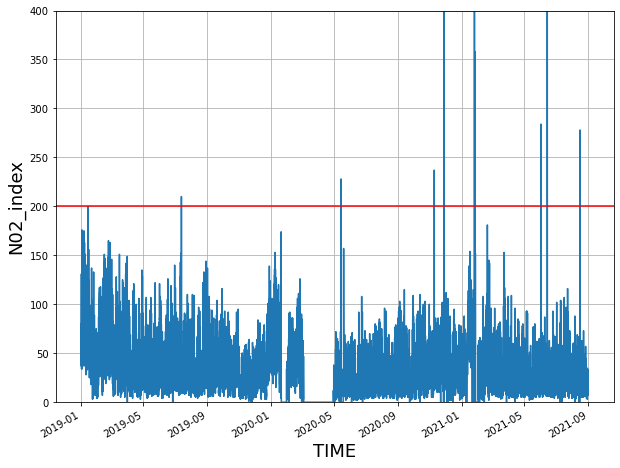

In [38]:
# Plotting  N02 index from POC dataset
plot = poc_air_index8_4['NO2_index'].plot(figsize=(10, 8))
plt.ylim(0,400)
plt.ylabel("N02_index", fontsize=18)
plt.xlabel("TIME", fontsize=18)
plt.grid()
plt.axhline(y=200, c='r')

In [25]:
import seaborn as sbn
sbn.set(rc={'figure.figsize':(10, 5)})

<AxesSubplot:xlabel='TIME'>

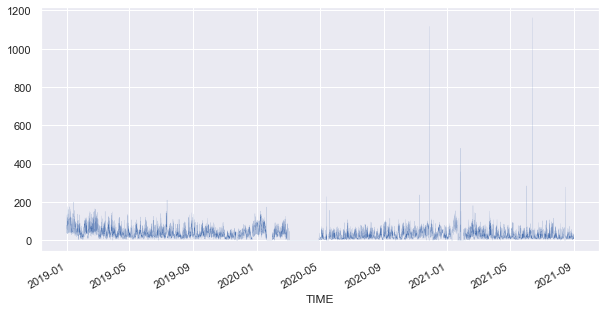

In [26]:
poc_air_index8_4['NO2_index'].plot(linewidth=0.1)

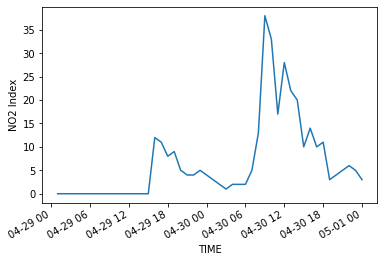

In [39]:
year = poc_air_index8_4.loc['2020-04','NO2_index'].plot()
year.set_ylabel('NO2 Index');

<AxesSubplot:xlabel='HORA', ylabel='NO2_index'>

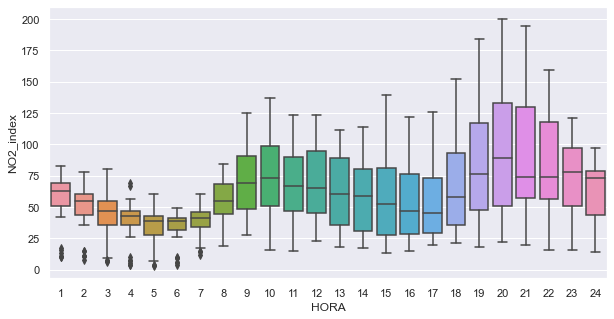

In [35]:
sbn.boxplot(data=poc_air_index8_4.loc['2019-01'], x='HORA', y='NO2_index')

POC DATASET: poc_air_index8_4

## WEATHER MEASUREMENTS REFERENCE FILE

Data is gather in real time by different stations locations across several areas in Madrid city. Data is storage in multiple files, but they were consolidated in only one reference file. (This is explained in notebook "1b_Extract_Concat_Weather_measurement.ipynb").

 The study will use ".csv", which follow this data structure (similar to the AirQuality reference file)

PROVINCIA | MUNICIPIO | ESTACION | MAGNITUD | PUNTO DE MUESTREO | AÑO | MES | DIA | Hxx (dato horario) | Vxx (código de validacion)
:--------: | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- 
28 | 079 | 004 | 01 | 28079004_1_38| 17 |07 | 01| 00005 | V 


**PROVINCIA.** Spanish province where the study is located. 28 belongs to Madrid

**MUNICIPIO.** Municipality where the study is located. 079 belongs to Madrid city

**ESTACION.** Measuring station. In Madrid there are 26 stations across all the districts.Some of them are measuring also AirQuality.

**MAGNITUD.** Every station measure different parameters related to air quality. Below is the list of Magnitud and metric measured:

    80 -> Ultraviolet radiation (MW/m2)
    
    81 -> Wind speed (m/s)
    
    82 -> Wind direction
    
    83 -> Temperature (ºC)
    
    86 -> Humidity (%)
    
    87 -> Barometric pressure (mb)
    
    88 -> Solar radiation (W/m2)
    
    89 -> Water precipitation (l/m2)

**PUNTO DE MUESTREO.** This is a code including the station id (including provincia, municipio y estacion), and adding the "magnitud" and "tecnica de muestreo".

**Hxx (dato horario).** Data value per hour.

**Vxx (codigo de validacion).** Flag to identify the valid measurements, filtering out others that may have some issue during the measurement process. So, __the only valid values have a "V" in this field.__

**H01/VO1, H02/V02.** There are 48 extra columns related to hour (H01 = 1:00 am, H02 = 2:00 am..) and validation (V01 = data flag related to the data aat 1:00 am...). NOTE. For practical reason in the analyis the representation of the hours have been modified 1 second, just to allow reference the H24 to the same date. This is just matter of data representation not altering any result in the analysis.

In [45]:
#Creating dataframe with all data from the reference Weather file.

weather_index = pd.read_csv ("../data/interim/Weather/ref_weather.csv", sep= ',')
weather_index.head()

,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,source_file
0,0,28,79,102,81,28079102_81_98,2021,5,1,0.97,...,V,1.37,V,0.93,V,0.85,V,1.10,V,may_meteo21.csv
1,1,28,79,102,81,28079102_81_98,2021,5,2,2.23,...,V,1.93,V,2.12,V,1.70,V,2.57,V,may_meteo21.csv
2,2,28,79,102,81,28079102_81_98,2021,5,3,2.70,...,V,1.27,V,2.60,V,1.92,V,2.75,V,may_meteo21.csv
3,3,28,79,102,81,28079102_81_98,2021,5,4,2.25,...,V,1.57,V,1.67,V,0.75,V,0.38,V,may_meteo21.csv
4,4,28,79,102,81,28079102_81_98,2021,5,5,1.00,...,V,1.62,V,1.57,V,1.18,V,0.68,V,may_meteo21.csv


In [49]:
#Checking null values

weather_index.isnull().sum()

Unnamed: 0        0
PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
ANO               0
MES               0
DIA               0
H01               0
V01               0
H02               0
V02               0
H03               0
V03               0
H04               0
V04               0
H05               0
V05               0
H06               0
V06               0
H07               0
V07               0
H08               0
V08               0
H09               0
V09               0
H10               0
V10               0
H11               0
V11               0
H12               0
V12               0
H13               0
V13               0
H14               0
V14               0
H15               0
V15               0
H16               0
V16               0
H17               0
V17               0
H18               0
V18               0
H19               0
V19               0
H20               0
V20               0
H21               0


The current data structure is not optimal for the analyis, so different transformation steps are going to be done.

1. Creation of TimeStamp just looking to simplify the data structure to something better to read. This is done with the function "to_datetime", concatenating the 3 fields in the original data in a date.https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [56]:
# Creation of a "DATE" field with the concatenation of ANO, MES & DIA
weather_index ['DATE'] = pd.to_datetime({'year': weather_index['ANO'],
                                                          'month': weather_index['MES'],
                                                          'day': weather_index['DIA']})

In [57]:
weather_index.head()

,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,...,H21,V21,H22,V22,H23,V23,H24,V24,source_file,DATE
0,0,28,79,102,81,28079102_81_98,2021,5,1,0.97,...,1.37,V,0.93,V,0.85,V,1.10,V,may_meteo21.csv,2021-05-01
1,1,28,79,102,81,28079102_81_98,2021,5,2,2.23,...,1.93,V,2.12,V,1.70,V,2.57,V,may_meteo21.csv,2021-05-02
2,2,28,79,102,81,28079102_81_98,2021,5,3,2.70,...,1.27,V,2.60,V,1.92,V,2.75,V,may_meteo21.csv,2021-05-03
3,3,28,79,102,81,28079102_81_98,2021,5,4,2.25,...,1.57,V,1.67,V,0.75,V,0.38,V,may_meteo21.csv,2021-05-04
4,4,28,79,102,81,28079102_81_98,2021,5,5,1.00,...,1.62,V,1.57,V,1.18,V,0.68,V,may_meteo21.csv,2021-05-05


2.Hour information is storage in multiple columns, one per hour. This is not practical to manage the dataset, so a second transformation step has been done using "wide to long" concept, using "melt" function from pandas. This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’
https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt

In [58]:
# Dataframe transformation, keeping needed data and creating measured variables originally in columns

weather_index = pd.melt(weather_index, id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO','DATE'], value_vars=['H01', 'H02', 'H03', 'H04', 'H05',
                                                                                                'H06', 'H07', 'H08', 'H09', 'H10',
                                                                                                'H11', 'H12', 'H13', 'H14', 'H15',
                                                                                                'H16', 'H17', 'H18', 'H19', 'H20',
                                                                                                'H21', 'H22', 'H23', 'H24'])

In [59]:
weather_index

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value
0,102,81,28079102_81_98,2021-05-01,H01,0.97
1,102,81,28079102_81_98,2021-05-02,H01,2.23
2,102,81,28079102_81_98,2021-05-03,H01,2.70
3,102,81,28079102_81_98,2021-05-04,H01,2.25
4,102,81,28079102_81_98,2021-05-05,H01,1.00
...,...,...,...,...,...,...
2102419,59,89,28079059_89_98,2019-03-27,H24,0.00
2102420,59,89,28079059_89_98,2019-03-28,H24,0.00
2102421,59,89,28079059_89_98,2019-03-29,H24,0.00
2102422,59,89,28079059_89_98,2019-03-30,H24,0.00


3. Stil data require some other transformation to allow us manipulate and visualize it properly, it requires to transform the "variables" from columns created with melt function together with the date to create a Timestamp field, what will facilitate us the data manipulation.

In [60]:
#Creation of HORA field based on the hourly columns manipulated with melt funcion and now storage in "variable" field

weather_index['HORA'] = [int(x[1:3]) for x in weather_index.variable.values]

In [61]:
weather_index

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA
0,102,81,28079102_81_98,2021-05-01,H01,0.97,1
1,102,81,28079102_81_98,2021-05-02,H01,2.23,1
2,102,81,28079102_81_98,2021-05-03,H01,2.70,1
3,102,81,28079102_81_98,2021-05-04,H01,2.25,1
4,102,81,28079102_81_98,2021-05-05,H01,1.00,1
...,...,...,...,...,...,...,...
2102419,59,89,28079059_89_98,2019-03-27,H24,0.00,24
2102420,59,89,28079059_89_98,2019-03-28,H24,0.00,24
2102421,59,89,28079059_89_98,2019-03-29,H24,0.00,24
2102422,59,89,28079059_89_98,2019-03-30,H24,0.00,24


In [62]:
#Creation of timestamp field

weather_index['TIME'] = weather_index['DATE'].astype(str) + ' ' + (weather_index['HORA']-1).astype(str) + ':59:59'

In [63]:
weather_index

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA,TIME
0,102,81,28079102_81_98,2021-05-01,H01,0.97,1,2021-05-01 0:59:59
1,102,81,28079102_81_98,2021-05-02,H01,2.23,1,2021-05-02 0:59:59
2,102,81,28079102_81_98,2021-05-03,H01,2.70,1,2021-05-03 0:59:59
3,102,81,28079102_81_98,2021-05-04,H01,2.25,1,2021-05-04 0:59:59
4,102,81,28079102_81_98,2021-05-05,H01,1.00,1,2021-05-05 0:59:59
...,...,...,...,...,...,...,...,...
2102419,59,89,28079059_89_98,2019-03-27,H24,0.00,24,2019-03-27 23:59:59
2102420,59,89,28079059_89_98,2019-03-28,H24,0.00,24,2019-03-28 23:59:59
2102421,59,89,28079059_89_98,2019-03-29,H24,0.00,24,2019-03-29 23:59:59
2102422,59,89,28079059_89_98,2019-03-30,H24,0.00,24,2019-03-30 23:59:59


In [64]:
pd.to_datetime(weather_index['TIME'] )

0         2021-05-01 00:59:59
1         2021-05-02 00:59:59
2         2021-05-03 00:59:59
3         2021-05-04 00:59:59
4         2021-05-05 00:59:59
                  ...        
2102419   2019-03-27 23:59:59
2102420   2019-03-28 23:59:59
2102421   2019-03-29 23:59:59
2102422   2019-03-30 23:59:59
2102423   2019-03-31 23:59:59
Name: TIME, Length: 2102424, dtype: datetime64[ns]

In [65]:
weather_index['TIME']=pd.to_datetime(weather_index['TIME'] )

In [66]:
weather_index

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA,TIME
0,102,81,28079102_81_98,2021-05-01,H01,0.97,1,2021-05-01 00:59:59
1,102,81,28079102_81_98,2021-05-02,H01,2.23,1,2021-05-02 00:59:59
2,102,81,28079102_81_98,2021-05-03,H01,2.70,1,2021-05-03 00:59:59
3,102,81,28079102_81_98,2021-05-04,H01,2.25,1,2021-05-04 00:59:59
4,102,81,28079102_81_98,2021-05-05,H01,1.00,1,2021-05-05 00:59:59
...,...,...,...,...,...,...,...,...
2102419,59,89,28079059_89_98,2019-03-27,H24,0.00,24,2019-03-27 23:59:59
2102420,59,89,28079059_89_98,2019-03-28,H24,0.00,24,2019-03-28 23:59:59
2102421,59,89,28079059_89_98,2019-03-29,H24,0.00,24,2019-03-29 23:59:59
2102422,59,89,28079059_89_98,2019-03-30,H24,0.00,24,2019-03-30 23:59:59


In [67]:
weather_index.index = weather_index.TIME

In [68]:
weather_index

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA,TIME
TIME,,,,,,,,
2021-05-01 00:59:59,102,81,28079102_81_98,2021-05-01,H01,0.97,1,2021-05-01 00:59:59
2021-05-02 00:59:59,102,81,28079102_81_98,2021-05-02,H01,2.23,1,2021-05-02 00:59:59
2021-05-03 00:59:59,102,81,28079102_81_98,2021-05-03,H01,2.70,1,2021-05-03 00:59:59
2021-05-04 00:59:59,102,81,28079102_81_98,2021-05-04,H01,2.25,1,2021-05-04 00:59:59
2021-05-05 00:59:59,102,81,28079102_81_98,2021-05-05,H01,1.00,1,2021-05-05 00:59:59
...,...,...,...,...,...,...,...,...
2019-03-27 23:59:59,59,89,28079059_89_98,2019-03-27,H24,0.00,24,2019-03-27 23:59:59
2019-03-28 23:59:59,59,89,28079059_89_98,2019-03-28,H24,0.00,24,2019-03-28 23:59:59
2019-03-29 23:59:59,59,89,28079059_89_98,2019-03-29,H24,0.00,24,2019-03-29 23:59:59


In [73]:

weather_index.drop(['variable'], axis = 'columns', inplace=True)
weather_index

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,value,HORA,TIME
TIME,,,,,,,
2021-05-01 00:59:59,102,81,28079102_81_98,2021-05-01,0.97,1,2021-05-01 00:59:59
2021-05-02 00:59:59,102,81,28079102_81_98,2021-05-02,2.23,1,2021-05-02 00:59:59
2021-05-03 00:59:59,102,81,28079102_81_98,2021-05-03,2.70,1,2021-05-03 00:59:59
2021-05-04 00:59:59,102,81,28079102_81_98,2021-05-04,2.25,1,2021-05-04 00:59:59
2021-05-05 00:59:59,102,81,28079102_81_98,2021-05-05,1.00,1,2021-05-05 00:59:59
...,...,...,...,...,...,...,...
2019-03-27 23:59:59,59,89,28079059_89_98,2019-03-27,0.00,24,2019-03-27 23:59:59
2019-03-28 23:59:59,59,89,28079059_89_98,2019-03-28,0.00,24,2019-03-28 23:59:59
2019-03-29 23:59:59,59,89,28079059_89_98,2019-03-29,0.00,24,2019-03-29 23:59:59


In [77]:
weather_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2102424 entries, 2021-05-01 00:59:59 to 2019-03-31 23:59:59
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   ESTACION        int64         
 1   MAGNITUD        int64         
 2   PUNTO_MUESTREO  object        
 3   DATE            datetime64[ns]
 4   value           float64       
 5   HORA            int64         
 6   TIME            datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 128.3+ MB


In [80]:
weather_index = weather_index[["ESTACION", "MAGNITUD","PUNTO_MUESTREO", "TIME", "DATE", "HORA", "value"]]
weather_index

,ESTACION,MAGNITUD,PUNTO_MUESTREO,TIME,DATE,HORA,value
TIME,,,,,,,
2021-05-01 00:59:59,102,81,28079102_81_98,2021-05-01 00:59:59,2021-05-01,1,0.97
2021-05-02 00:59:59,102,81,28079102_81_98,2021-05-02 00:59:59,2021-05-02,1,2.23
2021-05-03 00:59:59,102,81,28079102_81_98,2021-05-03 00:59:59,2021-05-03,1,2.70
2021-05-04 00:59:59,102,81,28079102_81_98,2021-05-04 00:59:59,2021-05-04,1,2.25
2021-05-05 00:59:59,102,81,28079102_81_98,2021-05-05 00:59:59,2021-05-05,1,1.00
...,...,...,...,...,...,...,...
2019-03-27 23:59:59,59,89,28079059_89_98,2019-03-27 23:59:59,2019-03-27,24,0.00
2019-03-28 23:59:59,59,89,28079059_89_98,2019-03-28 23:59:59,2019-03-28,24,0.00
2019-03-29 23:59:59,59,89,28079059_89_98,2019-03-29 23:59:59,2019-03-29,24,0.00


In [82]:
weather_index.sort_index().groupby(["MAGNITUD"]).head(2)

,ESTACION,MAGNITUD,PUNTO_MUESTREO,TIME,DATE,HORA,value
TIME,,,,,,,
2019-01-01 00:59:59,38,83,28079038_83_98,2019-01-01 00:59:59,2019-01-01,1,6.40
2019-01-01 00:59:59,107,81,28079107_81_98,2019-01-01 00:59:59,2019-01-01,1,0.45
2019-01-01 00:59:59,107,82,28079107_82_98,2019-01-01 00:59:59,2019-01-01,1,41.00
2019-01-01 00:59:59,36,86,28079036_86_98,2019-01-01 00:59:59,2019-01-01,1,59.00
2019-01-01 00:59:59,103,87,28079103_87_98,2019-01-01 00:59:59,2019-01-01,1,533.00
2019-01-01 00:59:59,36,83,28079036_83_98,2019-01-01 00:59:59,2019-01-01,1,4.20
2019-01-01 00:59:59,103,86,28079103_86_98,2019-01-01 00:59:59,2019-01-01,1,83.00
2019-01-01 00:59:59,56,82,28079056_82_98,2019-01-01 00:59:59,2019-01-01,1,48.00
2019-01-01 00:59:59,107,87,28079107_87_98,2019-01-01 00:59:59,2019-01-01,1,949.00


### CREATING POC DATASET (Weather Data)

In previous step POC dataset related to AirQuality Station #4 has been created. Weather metrics related to WeatherStation associate to the POC AirQuality station need to be added

This spatial analysis has been done in notebook "2_Geo inclufence weather station per air quality station.ipynb". This spatial analyis done identify that the closer Weather station for AirStation #4 is related to Weather station #4. (in this case is the same.

In [48]:
#Checking Reference file to link Weather station to Air Quality station

Ref = pd.read_csv ("../data/interim/Ref_file_WeatherStations4AirStations.csv", sep= ',')
Ref.head()

,WeatherStationCode,AirStationCode
0,4,4
1,8,8
2,16,16
3,18,18
4,24,24


In [74]:

poc_weather_index_4 = weather_index[(weather_index['ESTACION'] == 4) ]

In [75]:
poc_weather_index_4.head()

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,value,HORA,TIME
TIME,,,,,,,
2021-05-01 00:59:59,4,83,28079004_83_98,2021-05-01,10.3,1,2021-05-01 00:59:59
2021-05-02 00:59:59,4,83,28079004_83_98,2021-05-02,12.8,1,2021-05-02 00:59:59
2021-05-03 00:59:59,4,83,28079004_83_98,2021-05-03,13.5,1,2021-05-03 00:59:59
2021-05-04 00:59:59,4,83,28079004_83_98,2021-05-04,12.4,1,2021-05-04 00:59:59
2021-05-05 00:59:59,4,83,28079004_83_98,2021-05-05,14.3,1,2021-05-05 00:59:59


In [76]:
poc_weather_index_4.shape


(21120, 7)